**Assignment**

Vehicle insurance fraud involves conspiring to file false or exaggerated claims related to property
damage or personal injuries following an accident. Common examples include staged accidents,
where fraudsters deliberately "orchestrate" collisions; the use of phantom passengers, where
individuals do not present at the accident scene falsely claim to have suffered severe injuries; and
exaggerated personal injury claims, where minor injuries are portrayed as serious to maximize
compensation.
You have been assigned the task of developing a predictive model optimized to identify potential
fraudulent cases.


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the data

#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Download the data from github
df= pd.read_csv('https://raw.githubusercontent.com/NUELBUNDI/Machine-Learning-Data-Set/refs/heads/main/Insurance%20Fraud%20data.csv')
pd.set_option('display.max_columns', None)  # Show all columns
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# **Step 1: Data Preprocessing**

# a. Data Cleaning

In [ ]:
# Check missing values, duplicates and outliers

# 1. Missing Values
df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [ ]:
#2. Duplicates
df.duplicated().sum()

0

# b. Feature Engineering and Extraction




In [ ]:
#1. ClaimDuration:

#Combine the date columns to create one column for Accident date and one for Claim date

# For accident date:
# Define month mapping
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
# Apply mapping
df['Month_numeric'] = df['Month'].map(month_map)

# Day of the week mapping
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}

df['AccidentDate'] = pd.to_datetime(df[['Year','Month_numeric']].assign(Day=1).rename(columns={'Month_numeric': 'month'}))

# Adjust the date based on the week of the month
df['AccidentDate'] = df.apply(lambda row: row['AccidentDate'] + pd.DateOffset(weeks=row['WeekOfMonth'] - 1), axis=1)

# Adjust the estimated date to match the exact day of the week
df['AccidentDate'] = df.apply(lambda row: row['AccidentDate'] + pd.DateOffset(days=(day_map[row['DayOfWeek']] - row['AccidentDate'].weekday()) % 7), axis=1)


In [ ]:
#For Claim date:
# Define month mapping
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
# Apply mapping
df['Month_numeric'] = df['MonthClaimed'].map(month_map)

# Day of the week mapping
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}

df['ClaimDate'] = pd.to_datetime(df[['Year','Month_numeric']].assign(Day=1).rename(columns={'Month_numeric': 'month'}))

# Adjust the date based on the week of the month
df['ClaimDate'] = df.apply(lambda row: row['ClaimDate'] + pd.DateOffset(weeks=row['WeekOfMonthClaimed'] - 1), axis=1)

# Adjust the estimated date to match the exact day of the week
df['ClaimDate'] = df.apply(lambda row: row['ClaimDate'] + pd.DateOffset(days=(day_map.get(row['DayOfWeekClaimed'], row['ClaimDate'].weekday())- row['ClaimDate'].weekday()) % 7), axis=1)


In [ ]:
#Find Claim Duration
#Subtract the the time betweeen accident date and claim date
df['ClaimDuration'] = (df['ClaimDate'] - df['AccidentDate']).dt.days

In [ ]:
#Check why some values have a negative claim duration
df[df['ClaimDuration'] < 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_numeric,AccidentDate,ClaimDate,ClaimDuration
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1.0,1995-01-04,1994-01-04,-365.0
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,3.0,1994-11-04,1994-03-22,-227.0
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,2.0,1994-02-04,1994-02-02,-2.0
39,Nov,4,Thursday,Toyota,Urban,Tuesday,Jan,1,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,0,40,1,400,3,more than 30,more than 30,none,7 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,1.0,1994-11-24,1994-01-04,-324.0
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,21,Policy Holder,Sport - Collision,Sport,more than 69000,1,53,4,400,4,more than 30,more than 30,none,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,1.0,1994-07-17,1994-01-26,-172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,Jan,2,Sunday,Toyota,Urban,Tuesday,Jan,2,Male,Single,27,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,15399,7,400,1,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Liability,1.0,1996-01-14,1996-01-09,-5.0
15399,Jan,2,Sunday,Ford,Urban,Wednesday,Jan,2,Male,Married,39,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,15400,4,400,1,more than 30,more than 30,2 to 4,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils,1.0,1996-01-14,1996-01-10,-4.0
15400,Jan,2,Sunday,Honda,Urban,Monday,Jan,2,Male,Single,26,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15401,16,400,2,more than 30,more than 30,1,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,All Perils,1.0,1996-01-14,1996-01-08,-6.0
15406,Nov,3,Wednesday,Ford,Urban,Friday,Nov,3,Male,Single,32,Third Party,Sedan - Collision,Sedan,60000 to 69000,0,15407,6,400,4,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,11.0,1996-11-20,1996-11-15,-5.0


In [ ]:
#Drop these rows with negative ClaimDuration
df = df[df['ClaimDuration'] >= 0]
df.shape

(13495, 37)

# c. Feature Selection and Feature Encoding

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_numeric,AccidentDate,ClaimDate,ClaimDuration
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1.0,1994-01-19,1994-01-24,5.0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,11.0,1994-11-04,1994-11-10,6.0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7.0,1994-06-11,1994-07-01,20.0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,2.0,1994-01-31,1994-02-08,8.0
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,more than 69000,0,6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,11.0,1994-10-28,1994-11-02,5.0


In [ ]:
# Correlation Analysis done only on Numerical Features
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.head()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_numeric,ClaimDuration
1,3,4,34,0,2,15,400,4,1994,1.0,5.0
2,5,2,47,0,3,7,400,3,1994,11.0,6.0
3,2,1,65,0,4,4,400,2,1994,7.0,20.0
4,5,2,27,0,5,3,400,1,1994,2.0,8.0
5,4,1,20,0,6,12,400,3,1994,11.0,5.0


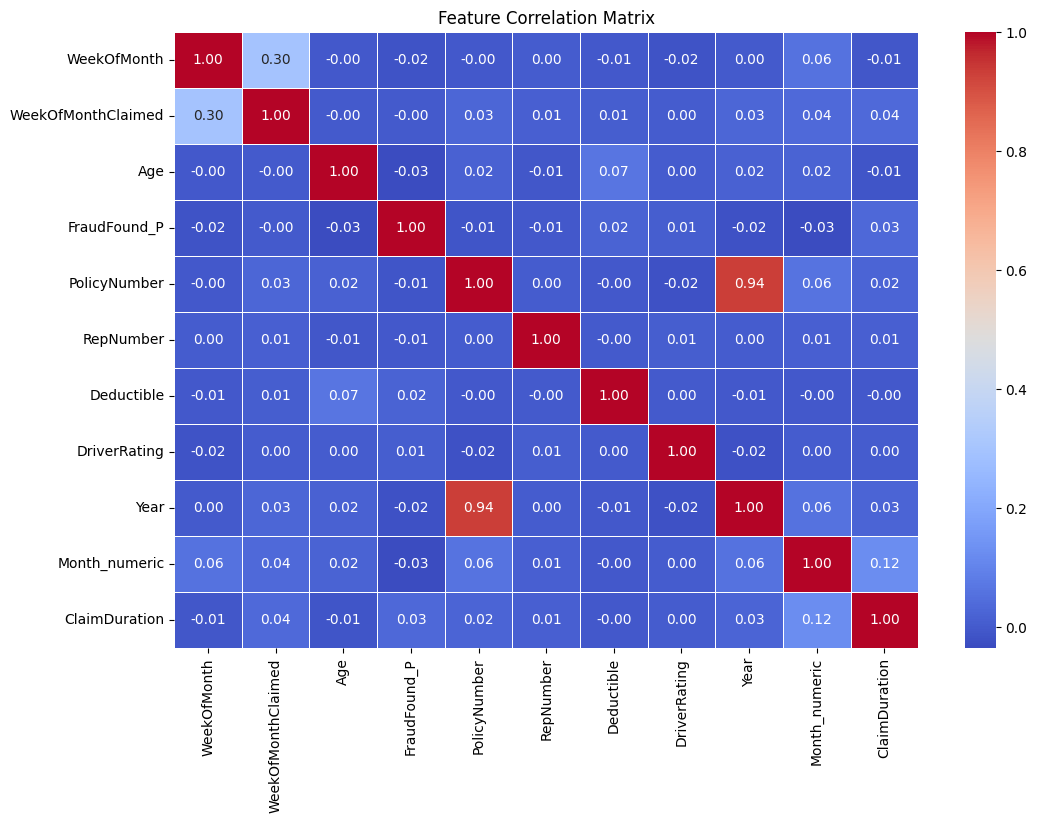

In [ ]:
# 1. Correlation analysis of these numerical variables
correlation_matrix = df_numerical.corr()

# Display the correlation matrix with heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Focus on the correlation with the target variable ('FraudFound_P')
correlation_with_target = correlation_matrix['FraudFound_P'].sort_values(ascending=False)

# Print the correlation with the target
print(correlation_with_target)

FraudFound_P          1.000000
ClaimDuration         0.033926
Deductible            0.021488
DriverRating          0.007379
WeekOfMonthClaimed   -0.002428
RepNumber            -0.006246
PolicyNumber         -0.013186
WeekOfMonth          -0.016255
Year                 -0.020404
Month_numeric        -0.032928
Age                  -0.034773
Name: FraudFound_P, dtype: float64


In [ ]:
# Set a threshold for minimum correlation strength
threshold = 0.02

# # Drop weak features from dataset
df = df.drop(correlation_with_target[correlation_with_target.abs() < threshold].index, axis=1)

#Show the numerical columns remaining after dropping
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.head()


,Age,FraudFound_P,Deductible,Year,Month_numeric,ClaimDuration
1,34,0,400,1994,1.0,5.0
2,47,0,400,1994,11.0,6.0
3,65,0,400,1994,7.0,20.0
4,27,0,400,1994,2.0,8.0
5,20,0,400,1994,11.0,5.0


In [ ]:
#2. Apply Tree-Based Feature Importance to get the best features from our dataset of both numerical and categorical features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#3. Convert ordinal features to numerical : Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder, NumberOfSuppliments, AddressChange_Claim, VehiclePrice

# Define ordinal mappings for conversion
ordinal_mappings = {
    "Days_Policy_Accident": {"none": 0, "1 to 7": 1, "8 to 15": 2, "15 to 30": 3, "more than 30": 4},
    "Days_Policy_Claim": {"none": 0, "8 to 15": 1, "15 to 30": 2, "more than 30": 3},
    "PastNumberOfClaims": {"none": 0, "1": 1, "2 to 4": 3, "more than 4": 3},
    "AgeOfVehicle": {"new": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5, "6 years": 6, "7 years": 7, "more than 7": 8},
    "AgeOfPolicyHolder": {"16 to 17": 1, "18 to 20": 2, "21 to 25": 3, "26 to 30": 4, "31 to 35": 5, "36 to 40": 6,
                           "41 to 50": 7, "51 to 65": 8, "over 65": 9},
    "NumberOfSuppliments": {"none": 0, "1 to 2": 1, "3 to 5": 2, "more than 5": 3},
    "AddressChange_Claim": {"no change": 0, "under 6 months": 1, "1 year": 2, "2 to 3 years": 3, "4 to 8 years": 4},
    "NumberOfCars": {"1 vehicle": 1, "2 vehicles": 2, "3 to 4": 3, "5 to 8": 4, "more than 8": 5},
    "VehiclePrice": {"less than 20000": 1, "20000 to 29000": 2, "30000 to 39000": 3, "40000 to 59000": 4, "60000 to 69000": 5, "more than 69000":6}
}

# Apply the mappings
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

df.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month_numeric,AccidentDate,ClaimDate,ClaimDuration
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,34,Policy Holder,Sport - Collision,Sport,6,0,400,4,3,0,6,5,Yes,No,External,0,0,1,1994,Collision,1.0,1994-01-19,1994-01-24,5.0
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,47,Policy Holder,Sport - Collision,Sport,6,0,400,4,3,1,7,7,No,No,External,0,0,1,1994,Collision,11.0,1994-11-04,1994-11-10,6.0
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,65,Third Party,Sedan - Liability,Sport,2,0,400,4,3,1,8,8,Yes,No,External,3,0,1,1994,Liability,7.0,1994-06-11,1994-07-01,20.0
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,27,Third Party,Sport - Collision,Sport,6,0,400,4,3,0,5,5,No,No,External,0,0,1,1994,Collision,2.0,1994-01-31,1994-02-08,8.0
5,Oct,Friday,Honda,Urban,Wednesday,Nov,Male,Single,20,Third Party,Sport - Collision,Sport,6,0,400,4,3,0,5,3,No,No,External,2,0,1,1994,Collision,11.0,1994-10-28,1994-11-02,5.0


In [ ]:
# Assuming 'df' is your DataFrame and 'FraudFound_P' is your target variable
X = df.drop('FraudFound_P', axis=1)

#Drop the date columns since they are not numerical
X = X.drop(['AccidentDate', 'ClaimDate'], axis=1, errors='ignore')

y = df['FraudFound_P']

# 4. Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Month','MonthClaimed', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'BasePolicy'])

print(X.head())

   Age  VehiclePrice  Deductible  Days_Policy_Accident  Days_Policy_Claim  \
1   34             6         400                     4                  3   
2   47             6         400                     4                  3   
3   65             2         400                     4                  3   
4   27             6         400                     4                  3   
5   20             6         400                     4                  3   

   PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  NumberOfSuppliments  \
1                   0             6                  5                    0   
2                   1             7                  7                    0   
3                   1             8                  8                    3   
4                   0             5                  5                    0   
5                   0             5                  3                    2   

   AddressChange_Claim  NumberOfCars  Year  Month_numeric  Cla

In [ ]:
#5. Apply a tree-based feature importance.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# You can set a threshold for feature importance and select top features
threshold = 0.03  # Example threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

#Print selected features
print(selected_features)

['Age', 'ClaimDuration', 'AgeOfVehicle', 'Month_numeric', 'AgeOfPolicyHolder', 'Year', 'NumberOfSuppliments', 'VehiclePrice', 'PastNumberOfClaims']


# e. Feature Scaling

In [ ]:
# 1. Standardize the selected features

# Convert the selected features to a dataframe first
selected_features_df = pd.DataFrame(X, columns=selected_features)
selected_features_df.head()

,Age,ClaimDuration,AgeOfVehicle,Month_numeric,AgeOfPolicyHolder,Year,NumberOfSuppliments,VehiclePrice,PastNumberOfClaims
1,34,5.0,6,1.0,5,1994,0,6,0
2,47,6.0,7,11.0,7,1994,0,6,1
3,65,20.0,8,7.0,8,1994,3,2,1
4,27,8.0,5,2.0,5,1994,0,6,0
5,20,5.0,5,11.0,3,1994,2,6,0


In [ ]:
#Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features_df)

# **Step 2: Train a Decision Tree Classifier(3Mrk)**

In [ ]:
#1. Train a Decision Tree Classifier on the preprocessed data

#Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

#Assign your X and y lable
X = scaled_features
y = df['FraudFound_P']

#Split your train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize your model
model = DecisionTreeClassifier(random_state=42)

#Train your model
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Use f1 score to evaluate model performance
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for basic model: {f1}")

F1 Score for basic model: 0.08854166666666667


In [ ]:
#2. Check for overfitting by comparing training and validation performance.

# Calculate training and validation accuracy
train_accuracy = model.score(X_train, y_train)
val_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.99935161170804
Validation Accuracy: 0.8703223416080029


If Training Accuracy ≈ Validation Accuracy → No overfitting

If Training Accuracy ≫ Validation Accuracy (e.g., 99% vs. 65%) → Overfitting.

# **Step 3: Optimize Decision Tree Hyperparameters(4Mrk)**

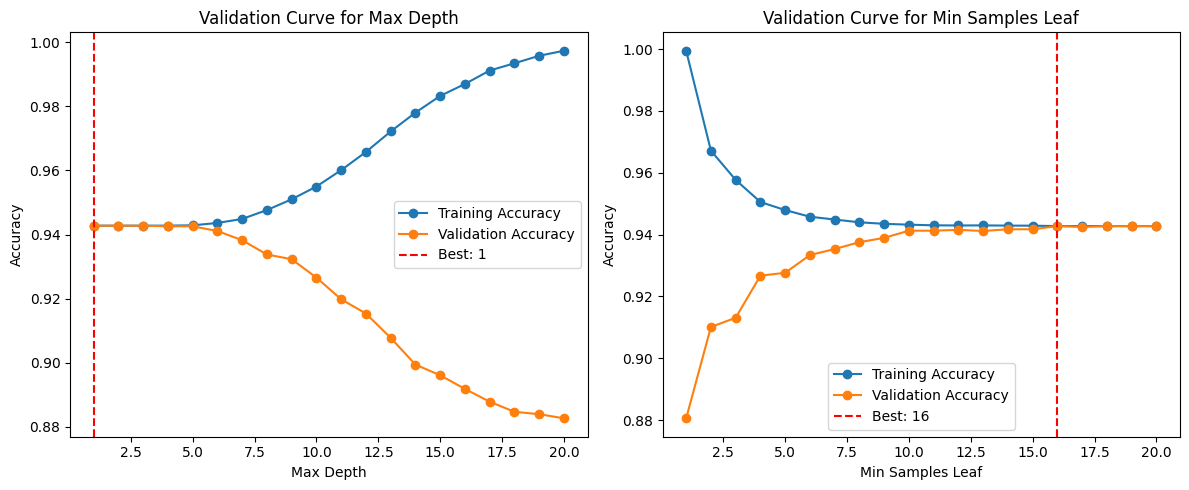

🔹 Best Parameters:
  - max_depth: 1
  - min_samples_leaf: 16

 Final Model Trained with Best Parameters!


In [ ]:
#1. Use a validation curve to identify the optimal values for max_depth and min_samples_leaf.

# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



def plot_validation_curves(X, y):
    """Plots validation curves for max_depth and min_samples_leaf in a Decision Tree Classifier
       and prints the best parameter values based on validation accuracy."""

    param_dict = {
        "max_depth": np.arange(1, 21),
        "min_samples_leaf": np.arange(1, 21)
    }

    best_params = {}

    plt.figure(figsize=(12, 5))

    for i, (param, values) in enumerate(param_dict.items(), 1):
        train_scores, val_scores = validation_curve(
            DecisionTreeClassifier(random_state=42), X, y,
            param_name=param, param_range=values, cv=5, scoring="accuracy"
        )

        train_mean, val_mean = np.mean(train_scores, axis=1), np.mean(val_scores, axis=1)

        # Find the best parameter (where validation accuracy is highest)
        best_idx = np.argmax(val_mean)
        best_params[param] = values[best_idx]

        # Plot
        plt.subplot(1, 2, i)
        plt.plot(values, train_mean, label="Training Accuracy", marker="o")
        plt.plot(values, val_mean, label="Validation Accuracy", marker="o")
        plt.axvline(values[best_idx], color="r", linestyle="--", label=f"Best: {values[best_idx]}")
        plt.xlabel(param.replace("_", " ").title())
        plt.ylabel("Accuracy")
        plt.title(f"Validation Curve for {param.replace('_', ' ').title()}")
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Print best parameters
    print("🔹 Best Parameters:")
    for param, value in best_params.items():
        print(f"  - {param}: {value}")

    return best_params

# Example Usage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_params = plot_validation_curves(X_train, y_train)

# Use the best parameters to train a final model
final_model = DecisionTreeClassifier(max_depth=best_params["max_depth"],
                                     min_samples_leaf=best_params["min_samples_leaf"],
                                     random_state=42)
final_model.fit(X_train, y_train)
print("\n Final Model Trained with Best Parameters!")


In [ ]:
#2. Compare the updated model’s performance to the initial model.

#The first model's f1 score
y_pred = model.predict(X_test)
original_f1 = f1_score(y_test, y_pred, average='weighted') # average='weighted'computes the weighted average for multi-class classification
print(f"F1 Score for basic model: {original_f1}")

#The second model's f1 score
y_pred = final_model.predict(X_test)
optimized_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score for optimized model: {optimized_f1}")


print(f"Original Model F1 Score: {original_f1:.4f}")
print(f"Optimized Model F1 Score: {optimized_f1:.4f}")

F1 Score for basic model: 0.8746880892941531
F1 Score for optimized model: 0.9021989128938063
Original Model F1 Score: 0.8747
Optimized Model F1 Score: 0.9022


The improvement in the F1 score is indicative that model perfomance improved with Optimization.

# **Step 4: Train Ensemble Models(7Mrk)**

In [ ]:
#Use at least two ensemble techniques

#I'll use two ensemble techniques: Random Forest Classifier and Gradient Boosting Classifier

#Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score

#I already have X and y as feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#1. RANDOMFOREST CLASSIFIER:

#Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model on training data
rf_model.fit(X_train, y_train)

# Predict on training and test datasets
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluate the performance using F1 Score Comparison for training and testing
rf_train_f1 = f1_score(y_train, rf_train_pred, average='weighted')
rf_test_f1 = f1_score(y_test, rf_test_pred, average='weighted')

print(f"Random Forest F1 - Train: {rf_train_f1}")
print(f"Random Forest F1 - Test: {rf_test_f1}")

#2. GRADIENTBOOSTING CLASSIFIER:

# Initialize GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on training data
gb_model.fit(X_train, y_train)

# Predict on training and test datasets
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

# Evaluate the performance using F1 Score Comparison for training and testing
gb_train_f1 = f1_score(y_train, gb_train_pred, average='weighted')
gb_test_f1 = f1_score(y_test, gb_test_pred, average='weighted')

print(f"\nGradient Boosting F1 - Train: {gb_train_f1}")
print(f"Gradient Boosting F1 - Test: {gb_test_f1}")

Random Forest F1 - Train: 0.9992567166328815
Random Forest F1 - Test: 0.901783899946029

Gradient Boosting F1 - Train: 0.9163408613659486
Gradient Boosting F1 - Test: 0.902013839051472


In [ ]:
#3. Train the original model again for comparison

# Initialize DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on training and test datasets
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Evaluate the performance using F1 Score Comparison for training and testing
dt_train_f1 = f1_score(y_train, dt_train_pred, average='weighted')
dt_test_f1 = f1_score(y_test, dt_test_pred, average='weighted')

print(f"Decision Tree F1 - Train: {dt_train_f1}")
print(f"Decision Tree F1 - Test: {dt_test_f1}")


Decision Tree F1 - Train: 0.9993498766446991
Decision Tree F1 - Test: 0.8746880892941531


In [ ]:
#4. Compare Model Performance
print("Model Comparison based on F1 Score:")
print(f"\nRandom Forest - Train F1: {rf_train_f1}, Test F1: {rf_test_f1}")
print(f"\nGradient Boosting - Train F1: {gb_train_f1}, Test F1: {gb_test_f1}")
print(f"\nDecision Tree - Train F1: {dt_train_f1}, Test F1: {dt_test_f1}")


Model Comparison based on F1 Score:

Random Forest - Train F1: 0.9992567166328815, Test F1: 0.901783899946029

Gradient Boosting - Train F1: 0.9163408613659486, Test F1: 0.902013839051472

Decision Tree - Train F1: 0.9993498766446991, Test F1: 0.8746880892941531


**Check for overfitting.**

If the model performs significantly better on the training data than on the test data, it might indicate overfitting. From the results, it shows that the Decision Tree Model has the most Over fitting. Followed by Random Forest, and the one with the least signs of Overfitting is Gradient Boosting.

Thus Gradient boosting has the least overfitting and is the best model so far.

 **Explanation for the observed performance.**

 Decision Trees can be prone to overfitting if not properly regularized.

 Random Forest often performs well because it reduces overfitting by averaging predictions across many trees.

 Gradient Boosting tends to work well for imbalanced datasets and can improve performance over Random Forest by building trees sequentially.

# **Step 5: Train an Artificial Neural Network (ANN)(5Mrk)**

In [ ]:
#Develop an ANN model with an architecture of your choice.

!pip install tensorflow

In [ ]:
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import train_test_split

#X (features) and y (target) are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#1. Build an initial simple ANN model

model = Sequential()

#Input Layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

#Hidden Layer
model.add(Dense(32, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification. Use 'softmax' for multi-class.

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Summarize the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#2. Train model on Training Data
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate on the test dataset
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9241 - loss: 0.3077 - val_accuracy: 0.9426 - val_loss: 0.2170
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9436 - loss: 0.2134 - val_accuracy: 0.9426 - val_loss: 0.2129
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9443 - loss: 0.2096 - val_accuracy: 0.9426 - val_loss: 0.2159
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9463 - loss: 0.2024 - val_accuracy: 0.9426 - val_loss: 0.2133
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9456 - loss: 0.2026 - val_accuracy: 0.9426 - val_loss: 0.2121
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9434 - loss: 0.2054 - val_accuracy: 0.9426 - val_loss: 0.2132
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9380 - loss: 0.2194 - val_accuracy: 0.9426 - val_loss: 0.2125
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9402 - loss: 0.2138 - val_accuracy: 0.

In [ ]:
#3. Build Enhanced ANN

#Experiment with the number of layers, neurons, activation functions, and optimizers to improve performance.

model = Sequential()

#Input Layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

#Hidden Layers with different architectures
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

#Output Layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Summarize the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#4. Retrain the ANN model and compare its results with previous model

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

#Evaluate the enhanced model on training and test datasets
train_loss_enhanced, train_acc_enhanced = model.evaluate(X_train, y_train)
test_loss_enhanced, test_acc_enhanced = model.evaluate(X_test, y_test)

print(f"Enhanced Train Accuracy: {train_acc_enhanced}")
print(f"Enhanced Test Accuracy: {test_acc_enhanced}")

Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9432 - loss: 0.2653 - val_accuracy: 0.9426 - val_loss: 0.2212
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9413 - loss: 0.2196 - val_accuracy: 0.9426 - val_loss: 0.2140
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9410 - loss: 0.2149 - val_accuracy: 0.9426 - val_loss: 0.2148
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9415 - loss: 0.2154 - val_accuracy: 0.9426 - val_loss: 0.2167
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9449 - loss: 0.2021 - val_accuracy: 0.9426 - val_loss: 0.2133
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9434 - loss: 0.2021 - val_accuracy: 0.9426 - val_loss: 0.2138
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9428 - loss: 0.2008 - val_accuracy: 0.9426 - val_loss: 0.2131
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9407 - loss: 0.2083 - val_accuracy

In [ ]:
#5. Compare the ANN performance to the previously  models like RF, GB, and DT. You can use F1 scores to compare them.

#F1 Score for the initial ANN model
initial_train_pred = (model.predict(X_train) > 0.5).astype("int32")
initial_test_pred = (model.predict(X_test) > 0.5).astype("int32")

initial_train_f1 = f1_score(y_train, initial_train_pred, average='weighted')
initial_test_f1 = f1_score(y_test, initial_test_pred, average='weighted')

#F1 Score for the enhanced ANN model
enhanced_train_pred = (model.predict(X_train) > 0.5).astype("int32")
enhanced_test_pred = (model.predict(X_test) > 0.5).astype("int32")

enhanced_train_f1 = f1_score(y_train, enhanced_train_pred, average='weighted')
enhanced_test_f1 = f1_score(y_test, enhanced_test_pred, average='weighted')

#Print F1 Scores for comparison
print(f"Initial ANN F1 - Train: {initial_train_f1}, Test: {initial_test_f1}")
print(f"Enhanced ANN F1 - Train: {enhanced_train_f1}, Test: {enhanced_test_f1}")

#5. Compare F1 Scores with previous models (Random Forest, Gradient Boosting, etc.)
print(f"Random Forest F1 - Train: {rf_train_f1}, Test: {rf_test_f1}")
print(f"Gradient Boosting F1 - Train: {gb_train_f1}, Test: {gb_test_f1}")
print(f"Decision Tree F1 - Train: {dt_train_f1}, Test: {dt_test_f1}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Initial ANN F1 - Train: 0.9149782049887415, Test: 0.902013839051472
Enhanced ANN F1 - Train: 0.9149782049887415, Test: 0.902013839051472
Random Forest F1 - Train: 0.9992567166328815, Test: 0.901783899946029
Gradient Boosting F1 - Train: 0.9163408613659486, Test: 0.902013839051472
Decision Tree F1 - Train: 0.9993498766446991, Test: 0.8746880892941531


In [ ]:
#Find the F1 score of the best model which is the enhanced ANN
print(f"Enhanced ANN F1 Score: {enhanced_test_f1:.4f}")

Enhanced ANN F1 Score: 0.9020


# **Step 6: Tune the Best-Performing Model (3Mrk)**

In [ ]:
#From above observation The Initial and Enhanced ANN perfom the same and are the best of all the models we have used.
#Enhanced ANN would probably perform better if we fine tuned it as follows

In [ ]:
#1. Tune the best model
!pip install keras-tuner --quiet

#Keras tuner to optimize the number of layers, neurons, and learning rate, RandomizedSearchCV is used for ensemble classifiers.
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output Layer

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define tuner
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

#2. Get best model
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.get_best_models(num_models=1)[0]

#3. Train the best model
best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 18s]
val_accuracy: 0.934049665927887

Best val_accuracy So Far: 0.934049665927887
Total elapsed time: 00h 01m 37s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9430 - loss: 0.2140 - val_accuracy: 0.9340 - val_loss: 0.2400
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9462 - loss: 0.2034 - val_accuracy: 0.9340 - val_loss: 0.2391
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9440 - loss: 0.2069 - val_accuracy: 0.9340 - val_loss: 0.2385
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9433 - loss: 0.2088 - val_accuracy: 0.9340 - val_loss: 0.2382
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9424 - loss: 0.2089 - val_accuracy: 0.9340 - val_loss: 0.2384
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9444 - loss: 0.2021 - val_accuracy: 0.9340 - val_loss: 0.2390
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9442 - loss: 0.2042 - val_accuracy: 0.9340 - val_loss: 0.2382
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9435 - loss: 0.2042 - val_accuracy: 0.

In [ ]:
#4. Compare the F1 score of the tuned ANN with the previous ANN.

# Predictions
optimized_pred = best_model.predict(X_test) > 0.5  # Adjust for classification

# Compute new F1 Score
optimized_f1 = f1_score(y_test, optimized_pred, average='weighted')

print(f"Tuned ANN F1 Score: {optimized_f1:.4f}")

#Find the F1 score of Enhanced ANN which was the best model
print(f"Previous ANN F1 Score: {enhanced_test_f1:.4f}")


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Tuned ANN F1 Score: 0.9022
Previous ANN F1 Score: 0.9020


The tuned ANN has a slightly improved F1 score.

The best model is the ANN with an F1 Score of 0.9022

# **Step 7: Save Your Best Model (1 Mrk)**

In [ ]:
#Since the best model is an ANN, we use TensorFlow’s .h5 format to save the model.

# Save the trained ANN model
best_model.save("best_ann_model.h5")

print("Best ANN model saved successfully as 'best_ann_model.h5'")

#The best model is saved and ready for deployment or further analysis